## Boston Marathon Data:

### 1. Importing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import sys
import gc
from IPython.display import Markdown, HTML
%matplotlib inline

In [2]:
df = pd.read_csv('2014BostonMarathon.csv')

### 2. Exploratory Analysis and Cleaning:

#### A. Null Values and Dropping Some:

In [3]:
# Looking at null-values:

starting_row_ct = len(df)
starting_nulls = pd.DataFrame(df.isna().sum())
starting_nulls = starting_nulls.where(starting_nulls.values != 0).dropna()

   Here is our starting row count: {{starting_row_ct}}.  
    
   We will wait before doing anything with a significant number of null-values, but it is good to know where
    our null-values are before setting out on further exploration. In this table we have removed all of the
    columns which do not have null-values, and isolated the columns that do have null-values: {{starting_nulls}}
        
   In the cell below, we will drop our 'Citizenship' feature (since it is similar to/overly-correlated with 
    our 'Country' feature). We will also drop the singular null-value in 'City', as it will be inconsequential
    and will lesson our errors as we move forward.

In [4]:
# Dropping 'Citizenship':

df.drop('ctz', axis = 1, inplace = True)

# Dropping the null-value in 'City':

df.dropna(axis = 0, how = 'any', subset = ['city'], inplace = True)

#### B. Understanding the Structure and Distrubution:

In [5]:
object_descr = df.describe(include = 'O')
num_descr = df.describe()
objects = pd.DataFrame(df.dtypes.loc[df.dtypes == 'O'])
ints = pd.DataFrame(df.dtypes.loc[df.dtypes == 'int64'])
floats = pd.DataFrame(df.dtypes.loc[df.dtypes == 'float'])

> Here, we have our feature-set and its corresponding data-types.  We can see that a lot
of our columns which we would expect to be numerical are, in fact, object-types. This shouldn't be too troublesome, but is always helpful to know as we move forward (We will actually be changing these to numeric columns in the next cells below).

<table width = '600' height = '100'  align = 'center'>
    <tr>
    </tr>
    <tr>
        <td> {{objects}} </td>
        <td> {{ints}}    </td>
        <td> {{floats}} </td>
    </tr>
</table>

>Here we have our descriptive statistics:
 Based on these, we can see that a majority of the participants are male, and the most
 predominant state represented was Massachusets (makes sense). 


<table width = '1000' align = 'center'>
    <tr> 
    </tr>
    <tr>
        <table align = 'center' >
            <tr>  
                <td style = 'text-align:center'> Numeric Columns </td>
            </tr>
            <tr>
                <td> {{num_descr}} </td>
            </tr>
        </table>
    </tr>
</table>


<table width = '1400' align = 'center'>
    <tr> 
        <table align = 'center'>
            <tr>
               <td style = 'text-align:center'> Object Columns </td> 
            </tr>
            <tr>
               <td> {{object_descr}} </td>
            </tr>
        </table>
    </tr>    
</table>



#### C. Dash Control:

In [6]:
# Had to take care of some dashes within the dataset ('-'), which were making it difficult to run models.  
# Did not want to drop these since that would cause a lot of information loss. Saved them to their own dataframe
# for now and then dropped them from the main data-fram since they only made up 336 rows (i.e. 1.05% of the data).

dashes = df.loc[(df['5k'] == '-') | (df['10k'] == '-') | (df['20k'] == '-') | (df['half'] == '-') |
       (df['25k'] == '-') | (df['30k'] == '-') | (df['35k'] == '-') | (df['40k'] == '-')]

df_2 = df.drop(index = dashes.index)

#### D. Dummy Control:

In [7]:
# Had to do some grouping to control dummies:
EUR = ['TUR', 'HUN', 'LUX', 'UKR', 'BLR', 'CRO', 'EST', 'SVK', 'SLO', 'POR', 'GRE', 'CZE', 'ROU', 'LIE',
       'POL', 'AUT', 'NOR', 'BEL', 'FIN', 'ISL']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in EUR), other = 'EUR')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in EUR), other = 'EUR')

SEA = ['PHI', 'THA', 'MAS', 'INA', 'NZL']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in SEA), other = 'SEA')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in SEA), other = 'SEA')

AFR = ['EGY', 'ZIM', 'TAN', 'ETH', 'MAR', 'KEN', 'RSA']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in AFR), other = 'AFR')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in AFR), other = 'AFR')

CAM = ['PAN', 'DOM', 'BAH', 'CAY', 'VGB', 'BAR', 'ESA', 'GUA', 'CRC', 'BER']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in CAM), other = 'CAM')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in CAM), other = 'CAM')

SAM = ['ECU', 'BOL', 'TRI', 'PER', 'URU', 'ARG', 'CHI', 'VEN']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in SAM), other = 'SAM')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in SAM), other = 'SAM')

MEA = ['QAT', 'BRN', 'ISR', 'UAE']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in MEA), other = 'MEA')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in MEA), other = 'MEA')

ASI = ['IND', 'RUS', 'TPE', 'SIN']
df['country'] = df['country'].where(df['country'].apply(lambda x: x not in ASI), other = 'ASI')
df_2['country'] = df_2['country'].where(df_2['country'].apply(lambda x: x not in ASI), other = 'ASI')

#### E. Error NaN/Inf Error Mitigation:

In [8]:
# Was getting an NaN, Inf, Value Too Large error when running the preliminary models. So: 

df_2['pace'] = pd.to_numeric(df_2['pace'], downcast = 'float')
df_2['official'] = pd.to_numeric(df_2['official'], downcast = 'float')
df_2['5k'] = pd.to_numeric(df_2['5k'], downcast = 'float')
df_2['10k'] = pd.to_numeric(df_2['10k'], downcast = 'float')
df_2['20k'] = pd.to_numeric(df_2['20k'], downcast = 'float')
df_2['half'] = pd.to_numeric(df_2['half'], downcast = 'float')
df_2['25k'] = pd.to_numeric(df_2['25k'], downcast = 'float')
df_2['30k'] = pd.to_numeric(df_2['30k'], downcast = 'float')
df_2['35k'] = pd.to_numeric(df_2['35k'], downcast = 'float')
df_2['40k'] = pd.to_numeric(df_2['40k'], downcast = 'float')


In [9]:
# Memory Mitigation (Resource cited below):

ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

cleaner = sorted([(x, sys.getsizeof(globals().get(x))) for x in dir() if not x.startswith('_') and x not in sys.modules and x not in ipython_vars], 
                 key=lambda x: x[1], reverse=True)

In [10]:
del object_descr, objects, num_descr, ints, floats, EUR, CAM, SAM, AFR, SEA, ASI, MEA 
gc.collect()

60

#### F. Preliminary Visualizations:

##### F-1. Correlation:

In [11]:
def corr_plotter():

    plt.figure(figsize = (9, 7), dpi = 90)
    sns.heatmap(df_2.corr(), annot = True)
    plt.show()

Below, we take a look at our correlation map:

We can see that our division, pace and gender division features look as if they will have meaningful correlations with some of their neighboring features (specifically overall and official - as in overall placement and official time, respectively). We will keep this in mind as we move forward.

{{corr_plotter()}}

##### F-2. Univariate Distributions:

In [12]:
# Looking at our numeric columns:

numeric_cols = df_2[['division', 'age', 'official', 'genderdiv', 'overall', 'pace']]

def numeric_plotter():
    
    numeric_cols.hist(bins = 40,
                      figsize = (14, 8), layout = [2, 3],
                      xlabelsize = 12, ylabelsize = 12, 
                      xrot = 60,
                      color = 'lightsteelblue', edgecolor = 'darkslateblue',
                      grid = False, alpha = .7)
    plt.tight_layout()
    plt.show()

It makes sense here that 'genderdiv' and 'overall' would be so evenly dispersed, given that gender is split relatively evenly for the participants in 2014.  Overall placement as well would be distributed evenly since you increment each placement each time you add one person.  Thus, each bin in the histogram would get a similar amount of participants.
'Official,' 'age,' 'division' and 'pace,' however, have more normal distributions, as we see below:
{{numeric_plotter()}}

In [13]:
# Looking at our object columns:
    # It was ultimately necessary to impute the mode for these columns for our visualizations.
    # This was down with a copied dataframe since we would deal with the NaN's differently just before modeling.

from sklearn.impute import SimpleImputer

graph_df = pd.DataFrame(df_2)

mode_imputer = SimpleImputer(strategy = 'most_frequent')
nan_columns_1 = mode_imputer.fit_transform(graph_df[['5k', '10k', '20k', 'half', '25k','35k','30k', '40k']])
nan_columns_1 = pd.DataFrame(nan_columns_1)


# Putting these back into our main dataframe:
graph_df['5k'] = nan_columns_1[[0]]
graph_df['10k'] = nan_columns_1[[1]]
graph_df['20k'] = nan_columns_1[[2]]
graph_df['half'] = nan_columns_1[[3]]
graph_df['25k'] = nan_columns_1[[4]]
graph_df['35k'] = nan_columns_1[[5]]
graph_df['30k'] = nan_columns_1[[6]]
graph_df['40k'] = nan_columns_1[[7]]

# Making a subset of the dataframe for plotting purposes:

checkpoints = graph_df[['5k', '10k', '20k', 'half', '25k','35k','30k', '40k']]

/usr/local/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [14]:
num_vis_fonts = {'fontsize':13}
num_vis_kwargs = {'linestyle':'-'}
num_rc_grapher = {'grid.color':'ghostwhite',
                  'axes.facecolor':'lavender', 
                  'boxplot.boxprops.linewidth': .55,
                  'figure.dpi': 100}

def grapher():
    
    with sns.axes_style('whitegrid', rc = num_rc_grapher):
        figure = plt.figure(figsize = (14, 7))
        sns.boxenplot(data = checkpoints, **num_vis_kwargs)
        plt.tick_params(axis = 'both', labelsize = 13)
        plt.ylabel("Time in Minutes", fontdict = num_vis_fonts)
        plt.xlabel("Distance in Meters", fontdict = num_vis_fonts)
        plt.show()

Here, we can see the number of observations grouped into their distances and the spread of times that were recorded for each distance.  As one might expect, the variation among recorded times increases as the distance increases.   

{{grapher()}}

In [15]:
# Looking at our Categorical Features:

categoricals = df[['gender', 'state', 'country', 'city']]


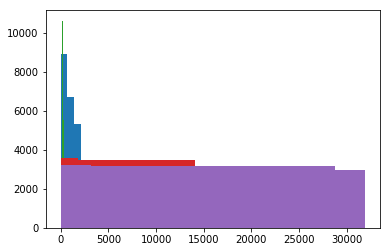

In [16]:
for column in numeric_cols:
    plt.hist(numeric_cols[column])

##### F-3. Multivariate Visualizations:

In [17]:
pair_df = df[['10k', 'division', '25k', 'gender', 'age', 'official', 'genderdiv', '35k', 
              'overall', 'pace', 'state', '30k', '5k', 'half', '20k', 'country', 'city', '40k']]

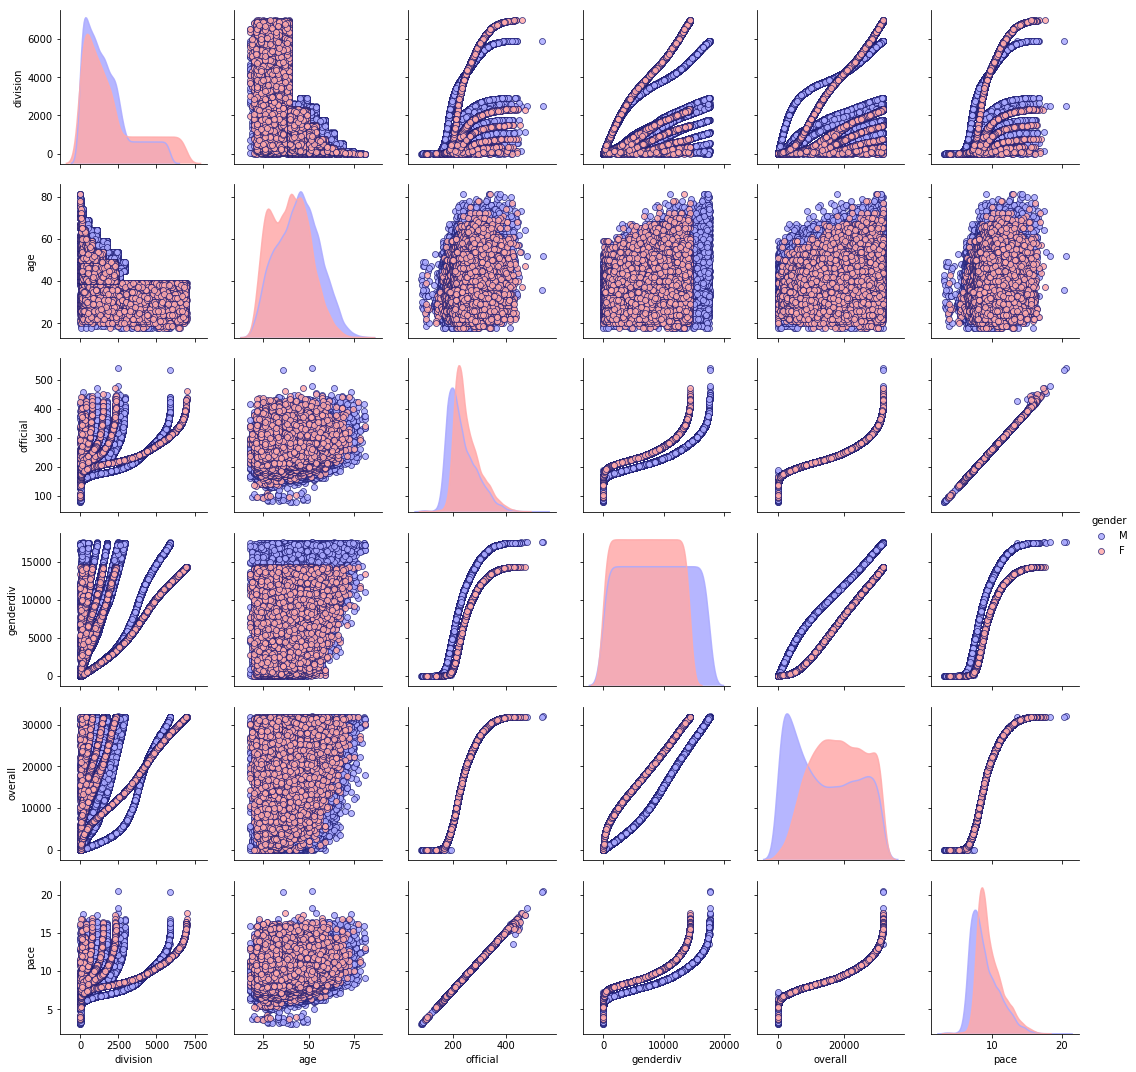

In [18]:
sns.pairplot(pair_df, hue = 'gender', palette = 'bwr', plot_kws = {'alpha':.85, 'linewidths':.15, 
                                                                   'edgecolor':'midnightblue'},
                                                       diag_kws = {'alpha':.85})
plt.show()

### Models:

In [19]:
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.cluster import KMeans, MeanShift, AffinityPropagation, SpectralClustering, MiniBatchKMeans


# Dropping our Na's (not many) and placing 'Foreign' where the state isn't listed.

df['state'].fillna('Foreign', inplace = True)
df_2['state'].fillna('Foreign', inplace = True)

df = df.dropna(axis = 1)
df_2 = df_2.dropna(axis = 1)

In [20]:
# Getting our dummies and sub-sampling the data:

X = pd.get_dummies(data = df_2.drop(['name', 'bib', 'state', 'city'], axis = 1))

feature_dict = {'division':'div', 'official':'ofl', 'genderdiv':'gendiv', 'gender_F':'F', 'gender_M':'M', 
                'country_AFR':'AFR', 'country_ASI':'ASI', 'country_AUS':'AUS', 'country_BRA':'BRA', 
                'country_CAM':'CAM', 'country_CAN':'CAN', 'country_CHN':'CHN', 'country_COL':'COL', 
                'country_DEN':'DEN', 'country_ESP':'ESP', 'country_EUR':'EUR', 'country_FRA':'FRA', 
                'country_GBR':'GBR', 'country_GER':'GER', 'country_HKG':'HKG', 'country_IRL':'IRL', 
                'country_ITA':'ITA', 'country_JPN':'JPN', 'country_KOR':'KOR', 'country_MEA':'MEA', 
                'country_MEX':'MEX', 'country_NED':'NED', 'country_SAM':'SAM', 'country_SEA':'SEA', 
                'country_SUI':'SUI', 'country_SWE':'SWE', 'country_USA':'USA'}

X = pd.DataFrame(X.rename(feature_dict, axis = 'columns'))

#### A. KMeans:

##### A-1. Fitting the Models:

In [21]:
KMeans_mini_1 = MiniBatchKMeans(n_clusters = 3)
KMeans_mini_1.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=3,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [22]:
KMeans_mini_2 = MiniBatchKMeans(n_clusters = 7)
KMeans_mini_2.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=7,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [23]:
KMeans_mini_3 = MiniBatchKMeans(n_clusters = 12)
KMeans_mini_3.fit(X)

MiniBatchKMeans(batch_size=100, compute_labels=True, init='k-means++',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=12,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

##### A-2. Exploring the Results:

In [24]:
# Creating a copy of our dummies dataframe so we can explore correlation of these results with our original 
# dataframe and our dummied dataframe: 

Xx = pd.DataFrame(X)

Xx['KMeans_3cl'] = KMeans_mini_1.labels_
Xx['KMeans_7cl'] = KMeans_mini_2.labels_
Xx['KMeans_12cl'] = KMeans_mini_3.labels_

# Getting the value count for each cluster:
vals_3 = pd.DataFrame(Xx.KMeans_3cl.value_counts())
vals_7 = pd.DataFrame(Xx.KMeans_7cl.value_counts())
vals_12 = pd.DataFrame(Xx.KMeans_12cl.value_counts())

# Getting descriptive statistics on them:
KMeans_descr = Xx[['KMeans_3cl', 'KMeans_7cl', 'KMeans_12cl']].describe()

# Extracting correlations and visualizing them:
KM3_corr = Xx.corr().KMeans_3cl.drop(columns = ['KMeans_7cl', 'KMeans_12cl'])
KM7_corr = Xx.corr().KMeans_7cl.drop(columns = ['KMeans_3cl', 'KMeans_12cl'])
KM12_corr = Xx.corr().KMeans_12cl.drop(columns = ['KMeans_7cl', 'KMeans_3cl'])

significant_3cl = pd.DataFrame(KM3_corr.loc[(KM3_corr >=.35)|(KM3_corr <= -.35)&(KM3_corr < .99)])
non_significant_3cl = pd.DataFrame(KM3_corr.loc[(KM3_corr <=.35)&(KM3_corr >= -.35)])

significant_7cl = pd.DataFrame(KM7_corr.loc[(KM7_corr >=.25)|(KM7_corr <= -.25)&(KM7_corr < .99)])
non_significant_7cl = pd.DataFrame(KM7_corr.loc[(KM7_corr <=.25)&(KM7_corr >= -.25)])

significant_12cl = pd.DataFrame(KM12_corr.loc[(KM12_corr >=.15)|(KM12_corr <= -.15)&(KM12_corr < .99)])
non_significant_12cl = pd.DataFrame(KM12_corr.loc[(KM12_corr <=.15)&(KM12_corr >= -.15)])

After running our models above, it is time to take a look at the results and the characteristics of the clusters.

We ran three models, each with 3, 7 and 12 clusters, and the cells below tell us quite a bit about them.  When we have fewer clusters, there is less variation in the amount of observations within those clusters.  To the right we can see the features with higher correlations within the dataset, perhaps our most meaningful insight thus far.  The features will change a little each time we run our model, but in general, the top-runners have been pace, age, gender, genderdiv, overall (placement) and official (time).  The descriptive statistics below show another view of the value counts within out clusters and the standard deviation amongst them. 




<html>
    <head>
    </head>
    <table width = '380' align = 'left'>
        <head>
            <th> </th>
            <th style = 'text-align:center'> Value Counts per Cluster </th>
            <th > </th>
        </head>
        <body>
            <tr style = 'margin:30px' >
                <td> 3 Clusters </td>
                <td> 7 Clusters </td>
                <td> 12 Clusters </td>
            </tr>
            <tr >
                <td style = 'vertical-align:center'> {{vals_3}} </td>    
                <td style = 'vertical-align:center'> {{vals_7}} </td>    
                <td style = 'vertical-align:center'> {{vals_12}} </td>
            </tr>
        </body>
    </table>
</html>
<html>
    <head>
    </head>
    <table width = '550' style = 'position:absolute;top:125px;left:525px' >
        <head>
            <th colspan = '3' style = 'text-align:center'>Features with High Correlation
            </th>
        </head>
        <body>
            <tr >
                <td style = 'text-align:center'> 3 Clusters </td>
                <td style = 'text-align:center'> 7 Clusters </td>
                <td style = 'text-align:center'> 12 Clusters </td>
            </tr>
            <tr >
                <td style='vertical-align:center'> {{significant_3cl.head(4)}} </td>
                <td style='vertical-align:center'> {{significant_7cl.head(4)}} </td>
                <td style='vertical-align:center'> {{significant_12cl.head(4)}} </td>
            </tr>
        </body>
        <body>
            <tr>
                <td> </td>
                <td> Descriptive Statistics </td>
            </tr>
            <tr>
                <td colspan = '3' style = 'text-align:center;vertical-align:top'>
                    {{KMeans_descr}} </td>
            </tr>
        </body>
    </table>
</html>






In [25]:
X = X.drop(columns = ['KMeans_3cl','KMeans_7cl','KMeans_12cl'])

In [88]:
KM_kws = {'alpha': .7,
            'color': 'slateblue',
            'edgecolor': 'midnightblue',
            'linewidth': .15}

def KMcorr_plotter():  # visualizing the count of features in coefficient value ranges:
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True)
    fig.subplots_adjust(hspace = .15, wspace = .15)

    sns.distplot(KM3_corr, ax = ax1, kde = False, hist_kws = KM_kws)
    ax1.set_title('3 Clusters', fontsize  = 14)
    ax1.set_ylabel('Number of Features with Coefficient Value', fontsize = 15)
    ax1.set_xlabel('Coefficient Value', fontsize = 14)
    
    sns.distplot(KM7_corr, ax = ax2, kde = False, hist_kws = KM_kws)
    ax2.set_title('7 Clusters', fontsize  = 14)
    ax2.set_xlabel('Coefficient Value', fontsize = 14)
    
    sns.distplot(KM12_corr, ax = ax3, kde = False, hist_kws = KM_kws)
    ax3.set_title('12 Clusters', fontsize  = 14)
    ax3.set_xlabel('Coefficient Value', fontsize = 14)

    plt.show()

def KMcorr_plotter2():  # Visualizing the correlation value for the cluster assignments and the feature-set:
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True)
    fig.subplots_adjust(hspace = .05, wspace = .03)

    sns.lineplot(x = Xx.corr().index, y = Xx.corr().KMeans_3cl, ax = ax1)
    ax1.set_title('3 Clusters', fontsize = 14)
    ax1.set_ylabel('Correlation Value', fontsize = 15)
    ax1.set_xticklabels(labels = Xx.corr().index, fontsize = 14, Rotation = 90)

    sns.lineplot(x = Xx.corr().index, y = Xx.corr().KMeans_7cl, ax = ax2)
    ax2.set_title('7 Clusters', fontsize = 14)
    ax2.set_ylabel('')
    ax2.set_xticklabels(labels = Xx.corr().index, fontsize = 14, Rotation = 90)

    sns.lineplot(x = Xx.corr().index, y = Xx.corr().KMeans_12cl, ax = ax3)
    ax3.set_title('12 Clusters', fontsize = 14)
    ax3.set_ylabel('')
    ax3.set_xticklabels(labels = Xx.corr().index, fontsize = 14, Rotation = 90)

    plt.show()

In [89]:
def KM_val_ct_plotter():   # Visualizing the number of samples pertaining to each cluster.
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True)
    fig.subplots_adjust(hspace = .15, wspace = .15)

    sns.countplot(x = Xx['KMeans_3cl'], ax = ax1)
    ax1.set_title('3 Clusters', fontsize = 14)
    ax1.set_ylabel('Number of Observations in each Cluster', fontsize = 14)
    ax1.set_xlabel('Cluster Groups', fontsize = 14)

    sns.countplot(x = Xx['KMeans_7cl'], ax = ax2)
    ax2.set_title('7 Clusters', fontsize = 14)
    ax2.set_ylabel('')
    ax2.set_xlabel('Cluster Groups', fontsize = 14)

    sns.countplot(x = Xx['KMeans_12cl'], ax = ax3)
    ax3.set_title('12 Clusters', fontsize = 14)
    ax3.set_ylabel('')
    ax3.set_xlabel('Cluster Groups', fontsize = 14)

    plt.show()

Below, we have a histogram showing the range of coefficient values provided by the feature set (i.e. the x-axis), and the number of features that fall into each category of value-ranges (i.e. the y-axis).  Looking at the distribution, we can see the correlations even-out as our model increases its number of clusters.  While this might initially seem to decrease any significance that our features might offer, it could, on the other hand, act as a balancing agent.  In other words, a feature that has a high correlation in our three cluster model, but a lower correlation in our twelve-cluster model (although still relatively high when considering it's neighboring features), might actually have a more accurate significance than a potentially overstated significance in the three-cluster model. 

{{KMcorr_plotter()}}

Below, we have another visualization of the correlation values per feature:

{{KMcorr_plotter2()}}

Here is a look at the value-counts for each cluster within each model scenario:

{{KM_val_ct_plotter()}}



In [112]:
df_2['KMeans_3cl'] = KMeans_mini_1.labels_
df_2['KMeans_7cl'] = KMeans_mini_2.labels_
df_2['KMeans_12cl'] = KMeans_mini_3.labels_

In [123]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': 'white',
          'axes.facecolor': '#EAEAF2',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        

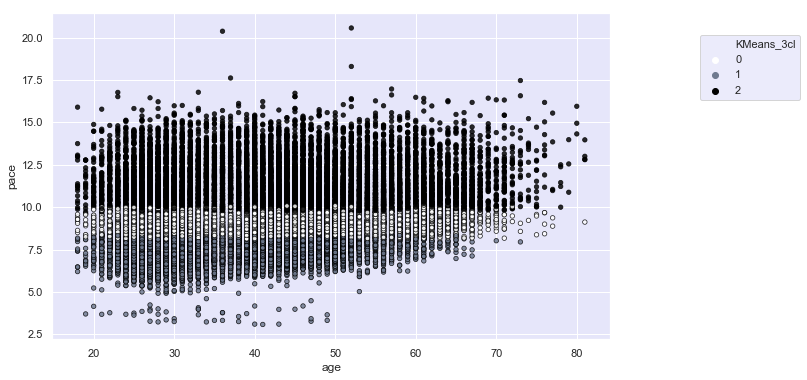

In [167]:
KMeans_kwargs = {'marker':'o',
                 's': 20,
                 'alpha': .83,
                 'linewidths':.5,
                 'edgecolor':'black'}

KMeans_rc = {'figure.dpi':70,
             'axes.facecolor':'lavender'}

with sns.axes_style(rc = KMeans_rc):
    plt.figure(figsize = (10, 6))
    sns.scatterplot(x = 'age', y = 'pace', hue = 'KMeans_3cl', data = df_2, 
                    palette = 'bone_r', **KMeans_kwargs)
    plt.legend(bbox_to_anchor = [.6, .2, .75, .75])
    

In [28]:
# Now looking at our silhouette scores:
from sklearn.metrics import pairwise_distances, silhouette_score

KM3_score = silhouette_score(X, Xx.KMeans_3cl)
KM7_score = silhouette_score(X, Xx.KMeans_7cl)
KM12_score = silhouette_score(X, Xx.KMeans_12cl)


Taking a look at our silhouette scores will also help us assess the quality of our clusters in each model:
- Three Model Cluster:   {{'{:.2f}'.format(KM3_score)}}
- Seven Model Cluster:   {{'{:.2f}'.format(KM7_score)}}
- Twelve Model Cluster:   {{'{:.2f}'.format(KM12_score)}}

Based on these results, it looks like our three-cluster model produces a better score than our seven and twelve-cluster models.  A number closer to one means that the clusters are more dense (less distance between datapoints and their centroid).  A number closer to zero indicates an increase in this distance and clusters that potentially overlay each other (according to the __[Scikit Learn Docummetnation on Silhouette Scores](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)__).  It is also important to note here that our models did not produce any negative scores, which would be an indicator of some samples being categorized under the wrong cluster.  

#### B. MeanShift:

In the cells below, we are looking at our MeanShift clustering algorithm - which has some different parameters we will use for tuning the model to find which is best.  We will be working with bandwidth here (i.e. the distance from each centroid which will serve as our classification 'net,' if you will.  Our models below try distances which are 5-10% of the average pairwise distance within each cluster.

In [29]:
from sklearn.cluster import estimate_bandwidth

subset_2 = X.sample(frac = .5)

In [30]:
bw1 = estimate_bandwidth(subset_2, quantile = .05)

MeanShift_1 = MeanShift(bandwidth = bw1, bin_seeding=True)
MeanShift_1.fit(subset_2)

MeanShift(bandwidth=2600.6036610934166, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [31]:
bw2 = estimate_bandwidth(subset_2, quantile = .07)

MeanShift_2 = MeanShift(bandwidth = bw2, bin_seeding = True)
MeanShift_2.fit(subset_2)

MeanShift(bandwidth=3103.7843779904842, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [32]:
bw3 = estimate_bandwidth(subset_2, quantile = .1)

MeanShift_3 = MeanShift(bandwidth = bw3, bin_seeding = True)
MeanShift_3.fit(subset_2)

MeanShift(bandwidth=3771.0192757497366, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [33]:
del numeric_cols, categoricals, checkpoints, nan_columns_1, dashes, feature_dict
gc.collect()


438

##### B-2. Exploring the Results:

In [84]:
# Appending the labels to our original dataframe:
subset_2df = pd.DataFrame(subset_2)

subset_2df['MeanShift_1'] = MeanShift_1.labels_
subset_2df['MeanShift_2'] = MeanShift_2.labels_
subset_2df['MeanShift_3'] = MeanShift_3.labels_

subset_2df = subset_2df

# Looking at the value counts within each cluster:
MS1_valcounts = pd.DataFrame(subset_2df['MeanShift_1'].value_counts())
MS2_valcounts = pd.DataFrame(subset_2df['MeanShift_2'].value_counts())
MS3_valcounts = pd.DataFrame(subset_2df['MeanShift_3'].value_counts())

# Bandwidth for each model:
a = {'Meanshift_1': MeanShift_1.bandwidth, 
     'Meanshift_2': MeanShift_2.bandwidth, 
     'Meanshift_3': MeanShift_3.bandwidth}

bandwidths = pd.DataFrame(data = a, index = [1])

# Getting descriptive statistics on them:
MeanShift_descr = pd.DataFrame(subset_2df[['MeanShift_1', 'MeanShift_2', 'MeanShift_3']].describe())

# Extracting correlations for visualization:
MS1_corr = subset_2df.corr().MeanShift_1.drop(columns = ['MeanShift_2', 'MeanShift_3'])
MS2_corr = subset_2df.corr().MeanShift_2.drop(columns = ['MeanShift_1', 'MeanShift_3'])
MS3_corr = subset_2df.corr().MeanShift_3.drop(columns = ['MeanShift_1', 'MeanShift_2'])

MS1_signf = pd.DataFrame(MS1_corr.loc[(MS1_corr >=.35)|(MS1_corr <= -.35)])
MS1_non_signf = pd.DataFrame(MS1_corr.loc[(MS1_corr <=.35)&(MS1_corr >= -.35)])

MS2_signf = pd.DataFrame(MS2_corr.loc[(MS2_corr >=.25)|(MS2_corr <= -.25)])
MS2_non_signf = pd.DataFrame(MS2_corr.loc[(MS2_corr <=.25)&(MS2_corr >= -.25)])

MS3_signf = pd.DataFrame(MS3_corr.loc[(MS3_corr >=.15)|(MS3_corr <= -.15)])
MS3_non_signf = pd.DataFrame(MS3_corr.loc[(MS3_corr <=.15)&(MS3_corr >= -.15)])


Let's take a look at the number of clusters in each model first and their corresponding bandwidth:

<html>
    <head>
        <table>
           <tr>
               <td> {{bandwidths}} </td>
           </tr>
        </table>
    </head>
</html>

Here are the rest of our descriptive statistics:

<html>
    <head>
    </head>
    <table width = '400' align = 'left'>
        <head>
            <th > </th>
            <th style = 'text-align:center'> Value Counts per Cluster </th>
            <th > </th>
        </head>
        <body>
            <tr style = 'margin:30px' >
                <td> MeanShift_1 </td>
                <td> MeanShift_2 </td>
                <td> MeanShift_3 </td>
            </tr>
            <tr >
                <td style = 'vertical-align:center'> {{MS1_valcounts}} </td>    
                <td style = 'vertical-align:center'> {{MS2_valcounts}} </td>    
                <td style = 'vertical-align:center'> {{MS3_valcounts}} </td>
            </tr>
        </body>
    </table>
</html>


<html>
    <head>
    </head>
    <table width = '550' style = 'position:absolute;top:148px;left:525px' >
        <head>
            <th colspan = '3' style = 'text-align:center'>Features with High Correlation
            </th>
        </head>
        <body>
            <tr >
                <td style = 'text-align:center'> MeanShift_1 </td>
                <td style = 'text-align:center'> MeanShift_2 </td>
                <td style = 'text-align:center'> MeanShift_3 </td>
            </tr>
            <tr >
                <td style='vertical-align:center'> {{MS1_signf.head(4)}} </td>
                <td style='vertical-align:center'> {{MS2_signf.head(4)}} </td>
                <td style='vertical-align:center'> {{MS3_signf.head(4)}} </td>
            </tr>
        </body>
        <body>
            <tr>
                <td> </td>
                <td> Descriptive Statistics </td>
                <td> </td>
            </tr>
                <td colspan = '3' style = 'text-align:center;vertical-align:top'>
                    {{MeanShift_descr}} </td>
            <tr>
            </tr>
        </body>
    </table>
</html>




In [85]:
KM_kws = {'alpha': .7,
            'color': 'slateblue',
            'edgecolor': 'midnightblue',
            'linewidth': .15}

def MScorr_plotter():  # visualizing the count of features in coefficient value ranges:
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True, sharex = True)
    fig.subplots_adjust(hspace = .15, wspace = .15)

    sns.distplot(MS1_corr, ax = ax1, kde = False, hist_kws = KM_kws)
    ax1.set_title('MeanShift_1', fontsize  = 14)
    ax1.set_ylabel('Number of Features with Coefficient Value', fontsize = 15)
    ax1.set_xlabel('Coefficient Value', fontsize = 14)
    
    sns.distplot(MS2_corr, ax = ax2, kde = False, hist_kws = KM_kws)
    ax2.set_title('MeanShift_2', fontsize  = 14)
    ax2.set_xlabel('Coefficient Value', fontsize = 14)
    
    sns.distplot(MS3_corr, ax = ax3, kde = False, hist_kws = KM_kws)
    ax3.set_title('MeanShift_3', fontsize  = 14)
    ax3.set_xlabel('Coefficient Value', fontsize = 14)

    plt.show()

def MScorr_plotter2():  # Visualizing the correlation value for the cluster assignments and the feature-set:
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True)
    fig.subplots_adjust(hspace = .05, wspace = .03)

    sns.lineplot(x = subset_2df.corr().index, y = subset_2df.corr().MeanShift_1, ax = ax1)
    ax1.set_title('MeanShift_1', fontsize = 14)
    ax1.set_ylabel('Correlation Value', fontsize = 15)
    ax1.set_xticklabels(labels = subset_2df.corr().index, fontsize = 14, Rotation = 90)

    sns.lineplot(x = subset_2df.corr().index, y = subset_2df.corr().MeanShift_2, ax = ax2)
    ax2.set_title('MeanShift_2', fontsize = 14)
    ax2.set_ylabel('')
    ax2.set_xticklabels(labels = subset_2df.corr().index, fontsize = 14, Rotation = 90)

    sns.lineplot(x = subset_2df.corr().index, y = subset_2df.corr().MeanShift_3, ax = ax3)
    ax3.set_title('MeanShift_3', fontsize = 14)
    ax3.set_ylabel('')
    ax3.set_xticklabels(labels = subset_2df.corr().index, fontsize = 14, Rotation = 90)

    plt.show()

In [86]:
def MS_val_ct_plotter():   # Visualizing the number of samples pertaining to each cluster.
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True)
    fig.subplots_adjust(hspace = .15, wspace = .15)

    sns.countplot(x = subset_2df['MeanShift_1'], ax = ax1)
    ax1.set_title('MeanShift_1', fontsize = 14)
    ax1.set_ylabel('Number of Observations in each Cluster', fontsize = 14)
    ax1.set_xlabel('Cluster Groups', fontsize = 14)

    sns.countplot(x = subset_2df['MeanShift_2'], ax = ax2)
    ax2.set_title('MeanShift_2', fontsize = 14)
    ax2.set_ylabel('')
    ax2.set_xlabel('Cluster Groups', fontsize = 14)

    sns.countplot(x = subset_2df['MeanShift_3'], ax = ax3)
    ax3.set_title('MeanShift_3', fontsize = 14)
    ax3.set_ylabel('')
    ax3.set_xlabel('Cluster Groups', fontsize = 14)

    plt.show()

{{MScorr_plotter()}}

{{MScorr_plotter2()}}

{{MS_val_ct_plotter()}}

In [87]:
# Now looking at our silhouette scores:
from sklearn.metrics import pairwise_distances, silhouette_score

MS1_score = silhouette_score(subset_2df, subset_2df.MeanShift_1)
MS2_score = silhouette_score(subset_2df, subset_2df.MeanShift_2)
MS3_score = silhouette_score(subset_2df, subset_2df.MeanShift_3)


Taking a look at our silhouette scores will also help us assess the quality of our clusters in each model:
- MeanShift_1:   {{'{:.2f}'.format(MS1_score)}}
- MeanShift_2:   {{'{:.2f}'.format(MS2_score)}}
- MeanShift_3:   {{'{:.2f}'.format(MS3_score)}}

Here, it looks like our last model produced the best silhouette score, although our second model was able to produce a nice correlation score above.  You would probably want to use these parameters as a starting point for further tuning.

#### C-1. Spectral Clustering:

In [71]:
subset_3 = X.sample(frac = .1)

In [90]:
Spectral_1 = SpectralClustering()
Spectral_1.fit(subset_3)

/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pai

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=8, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [92]:
Spectral_2 = SpectralClustering(n_clusters = 9)
Spectral_2.fit(subset_3)

/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pai

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=9, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

In [94]:
Spectral_3 = SpectralClustering(n_clusters = 7)
Spectral_3.fit(subset_3)

/usr/local/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/site-packages/sklearn/metrics/pai

SpectralClustering(affinity='rbf', assign_labels='kmeans', coef0=1, degree=3,
          eigen_solver=None, eigen_tol=0.0, gamma=1.0, kernel_params=None,
          n_clusters=7, n_init=10, n_jobs=1, n_neighbors=10,
          random_state=None)

##### C-2. Exploring the Results:

In [101]:
# Appending cluster labels to our input dataframe:
subset_3df = pd.DataFrame(subset_3)

subset_3df['Spectral_1'] = Spectral_1.labels_
subset_3df['Spectral_2'] = Spectral_2.labels_
subset_3df['Spectral_3'] = Spectral_3.labels_

In [98]:
# Looking at the value counts within each cluster:
S1_valcounts = pd.DataFrame(subset_3df['Spectral_1'].value_counts())
S2_valcounts = pd.DataFrame(subset_3df['Spectral_2'].value_counts())
S3_valcounts = pd.DataFrame(subset_3df['Spectral_3'].value_counts())

# Getting descriptive statistics on them:
S_descr = subset_3df[['Spectral_1', 'Spectral_2', 'Spectral_3']].describe()

# Extracting correlations for visualization:
S1_corr = subset_3df.corr().Spectral_1.drop(columns = ['Spectral_2', 'Spectral_3'])
S2_corr = subset_3df.corr().Spectral_2.drop(columns = ['Spectral_1', 'Spectral_3'])
S3_corr = subset_3df.corr().Spectral_3.drop(columns = ['Spectral_2', 'Spectral_1'])

S1_signf = pd.DataFrame(S1_corr.loc[(S1_corr >=.35)|(S1_corr <= -.35)])
S1_non_signf = pd.DataFrame(S1_corr.loc[(S1_corr <=.35)&(S1_corr >= -.35)])

S2_signf = pd.DataFrame(S2_corr.loc[(S2_corr >=.25)|(S2_corr <= -.25)])
S2_non_signf = pd.DataFrame(S2_corr.loc[(S2_corr <=.25)&(S2_corr >= -.25)])

S3_signf = pd.DataFrame(S3_corr.loc[(S3_corr >=.15)|(S3_corr <= -.15)])
S3_non_signf = pd.DataFrame(S3_corr.loc[(S3_corr <=.15)&(S3_corr >= -.15)])

So, it looks as if our Spectral models are only giving us one cluster, no matter how many clusters we specify as a result.  This is probably because of our data-subset, which isn't big enough to give varied input for more clusters.  It is tricky to balance the size of the subset with the run-time of the model.

<head>
    <table>
        <tr>
            <td> {{S1_valcounts}}</td>
            <td> {{S2_valcounts}}</td>
            <td> {{S3_valcounts}}</td>
        </tr>
    </table>
</head>

In [54]:
# Receiving only one cluster does not allow us to run our scoring code either:

# Now looking at our silhouette scores:
from sklearn.metrics import pairwise_distances, silhouette_score

S1_score = silhouette_score(subset_3df, subset_3df.Spectral_1)
S2_score = silhouette_score(subset_3df, subset_3df.Spectral_2)
S3_score = silhouette_score(subset_3df, subset_3df.Spectral_3)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

#### D. Affinity Propagation:

In [55]:
subset_4 = X.sample(frac = .15)

In [64]:
AP_1 = AffinityPropagation(.8)
AP_1.fit(subset_4)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.8, max_iter=200, preference=None, verbose=False)

In [65]:
AP_2 = AffinityPropagation(damping = .85)
AP_2.fit(subset_4)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.85, max_iter=200, preference=None, verbose=False)

In [66]:
AP_3 = AffinityPropagation(damping = .9)
AP_3.fit(subset_4)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.9, max_iter=200, preference=None, verbose=False)

##### D-2. Exploring the Results:

In [102]:
# Appending cluster labels to our input dataframe:
subset_4df = pd.DataFrame(subset_4)

subset_4df['AP_1'] = AP_1.labels_
subset_4df['AP_2'] = AP_2.labels_
subset_4df['AP_3'] = AP_3.labels_

# Looking at the value counts within each cluster:
AP1_valcounts = pd.DataFrame(subset_4df['AP_1'].value_counts())
AP2_valcounts = pd.DataFrame(subset_4df['AP_2'].value_counts())
AP3_valcounts = pd.DataFrame(subset_4df['AP_3'].value_counts())

# Getting descriptive statistics on them:
AP_descr = subset_4df[['AP_1', 'AP_2', 'AP_3']].describe()

# Extracting correlations for visualization:
AP1_corr = (subset_4df.corr().AP_1).drop(columns = ['AP_2', 'AP_3'])
AP2_corr = (subset_4df.corr().AP_2).drop(columns = ['AP_1', 'AP_3'])
AP3_corr = (subset_4df.corr().AP_3).drop(columns = ['AP_2', 'AP_1'])

AP1_signf = pd.DataFrame(AP1_corr.loc[(AP1_corr >=.35)|(AP1_corr <= -.35)])
AP1_non_signf = pd.DataFrame(AP1_corr.loc[(AP1_corr <=.35)&(AP1_corr >= -.35)])

AP2_signf = pd.DataFrame(AP2_corr.loc[(AP2_corr >=.25)|(AP2_corr <= -.25)])
AP2_non_signf = pd.DataFrame(AP2_corr.loc[(AP2_corr <=.25)&(AP2_corr >= -.25)])

AP3_signf = pd.DataFrame(AP3_corr.loc[(AP3_corr >=.15)|(AP3_corr <= -.15)])
AP3_non_signf = pd.DataFrame(AP3_corr.loc[(AP3_corr <=.15)&(AP3_corr >= -.15)])

Here are the rest of our descriptive statistics:

<html>
    <head>
    </head>
    <table width = '400' align = 'left'>
        <head>
            <th > </th>
            <th style = 'text-align:center'> Value Counts per Cluster </th>
            <th > </th>
        </head>
        <body>
            <tr style = 'margin:30px' >
                <td> AP1_valcounts </td>
                <td> AP2_valcounts </td>
                <td> AP3_valcounts </td>
            </tr>
            <tr >
                <td style = 'vertical-align:center'> {{AP1_valcounts}} </td>    
                <td style = 'vertical-align:center'> {{AP2_valcounts}} </td>    
                <td style = 'vertical-align:center'> {{AP3_valcounts}} </td>
            </tr>
        </body>
    </table>
</html>


<html>
    <head>
    </head>
    <table width = '550' style = 'position:absolute;top:148px;left:525px' >
        <head>
            <th colspan = '3' style = 'text-align:center'>Features with High Correlation
            </th>
        </head>
        <body>
            <tr >
                <td style = 'text-align:center'> AP_1 </td>
                <td style = 'text-align:center'> AP_2 </td>
                <td style = 'text-align:center'> AP_3 </td>
            </tr>
            <tr >
                <td style='vertical-align:center'> {{AP1_signf.head(4)}} </td>
                <td style='vertical-align:center'> {{AP2_signf.head(4)}} </td>
                <td style='vertical-align:center'> {{AP3_signf.head(4)}} </td>
            </tr>
        </body>
        <body>
            <tr>
                <td> </td>
                <td> Descriptive Statistics </td>
                <td> </td>
            </tr>
                <td colspan = '3' style = 'text-align:center;vertical-align:top'>
                    {{AP_descr}} </td>
            <tr>
            </tr>
        </body>
    </table>
</html>




In [82]:
KM_kws = {'alpha': .7,
            'color': 'slateblue',
            'edgecolor': 'midnightblue',
            'linewidth': .15}

def APcorr_plotter():  # visualizing the count of features in coefficient value ranges:
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True, sharex = True)
    fig.subplots_adjust(hspace = .15, wspace = .15)

    sns.distplot(AP1_corr, ax = ax1, kde = False, hist_kws = KM_kws)
    ax1.set_title('AP_1', fontsize  = 14)
    ax1.set_ylabel('Number of Features with Coefficient Value', fontsize = 15)
    ax1.set_xlabel('Coefficient Value', fontsize = 14)
    
    sns.distplot(AP2_corr, ax = ax2, kde = False, hist_kws = KM_kws)
    ax2.set_title('AP_2', fontsize  = 14)
    ax2.set_xlabel('Coefficient Value', fontsize = 14)
    
    sns.distplot(AP3_corr, ax = ax3, kde = False, hist_kws = KM_kws)
    ax3.set_title('AP_3', fontsize  = 14)
    ax3.set_xlabel('Coefficient Value', fontsize = 14)

    plt.show()

def APcorr_plotter2():  # Visualizing the correlation value for the cluster assignments and the feature-set:
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True)
    fig.subplots_adjust(hspace = .05, wspace = .03)

    sns.lineplot(x = subset_4df.corr().index, y = subset_4df.corr().AP_1, ax = ax1)
    ax1.set_title('AP_1', fontsize = 14)
    ax1.set_ylabel('Correlation Value', fontsize = 15)
    ax1.set_xticklabels(labels = subset_2df.corr().index, fontsize = 14, Rotation = 90)

    sns.lineplot(x = subset_4df.corr().index, y = subset_4df.corr().AP_2, ax = ax2)
    ax2.set_title('AP_2', fontsize = 14)
    ax2.set_ylabel('')
    ax2.set_xticklabels(labels = subset_2df.corr().index, fontsize = 14, Rotation = 90)

    sns.lineplot(x = subset_4df.corr().index, y = subset_4df.corr().AP_3, ax = ax3)
    ax3.set_title('AP_3', fontsize = 14)
    ax3.set_ylabel('')
    ax3.set_xticklabels(labels = subset_2df.corr().index, fontsize = 14, Rotation = 90)

    plt.show()

In [83]:
def AP_val_ct_plotter():   # Visualizing the number of samples pertaining to each cluster.
    
    fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (28, 9), sharey = True)
    fig.subplots_adjust(hspace = .15, wspace = .15)

    sns.countplot(x = subset_4df['AP_1'], ax = ax1)
    ax1.set_title('AP_1', fontsize = 14)
    ax1.set_ylabel('Number of Observations in each Cluster', fontsize = 14)
    ax1.set_xlabel('Cluster Groups', fontsize = 14)

    sns.countplot(x = subset_4df['AP_2'], ax = ax2)
    ax2.set_title('AP_2', fontsize = 14)
    ax2.set_ylabel('')
    ax2.set_xlabel('Cluster Groups', fontsize = 14)

    sns.countplot(x = subset_4df['AP_3'], ax = ax3)
    ax3.set_title('AP_3', fontsize = 14)
    ax3.set_ylabel('')
    ax3.set_xlabel('Cluster Groups', fontsize = 14)

    plt.show()

{{APcorr_plotter()}}

{{APcorr_plotter2()}}

{{AP_val_ct_plotter()}}

In [78]:
# Now looking at our silhouette scores:
from sklearn.metrics import pairwise_distances, silhouette_score

AP1_score = silhouette_score(subset_4df, subset_4df.AP_1)
AP2_score = silhouette_score(subset_4df, subset_4df.AP_2)
AP3_score = silhouette_score(subset_4df, subset_4df.AP_3)

Here are the Silhouette Scores for our Affinity Propagation Models:

<head>
    <table>
        <th style = 'text-align:center' > AP_1</th>
        <th style = 'text-align:center' > AP_2</th>
        <th style = 'text-align:center' > AP_3 </th>
        <tr>
            <td style = 'text-align:center' > {{'{:.2f}'.format(AP1_score)}}</td>
            <td style = 'text-align:center' > {{'{:.2f}'.format(AP2_score)}}</td>
            <td style = 'text-align:center' > {{'{:.2f}'.format(AP3_score)}}</td>
        </tr>
    </table>
</head>

These are actually pretty good - and something you would want to consider if you wanted something that was more specific (although it does stand on the threshold of overfitting if you consider the amount of clusters and their distributions in the graphs above). Based on the results thus far, it seems as if a smaller-cluster KMeans and MeanShift algorithms are the way to go with this data-set, and an Affinity Propagation algorithm with a fairly high damping model will get you a decent model.  With these models, we see fairly consistent class balances between clusters, as well as clusters that are more dense in comparison to other similar models.